# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [3]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
# Print dataset

print(dataset.head())


   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Print dataset shape

print(dataset.shape)

(150, 5)


In [6]:
# Print column names

print(dataset.columns.tolist())

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower']


2. Drop rows with any missing values


In [7]:
# Drop na

dataset.dropna(inplace=True)

3. Encoding the class label categorical column: from string to num


In [8]:
dataset["Flower"] = dataset["Flower"].str.strip()  # Elimina espacios en blanco
dataset["Flower"] = dataset["Flower"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})


Now the label/category is numeric


4. Discard columns that won't be used


In [9]:
# Drop out non necesary columns



5. Scatter plot of the data

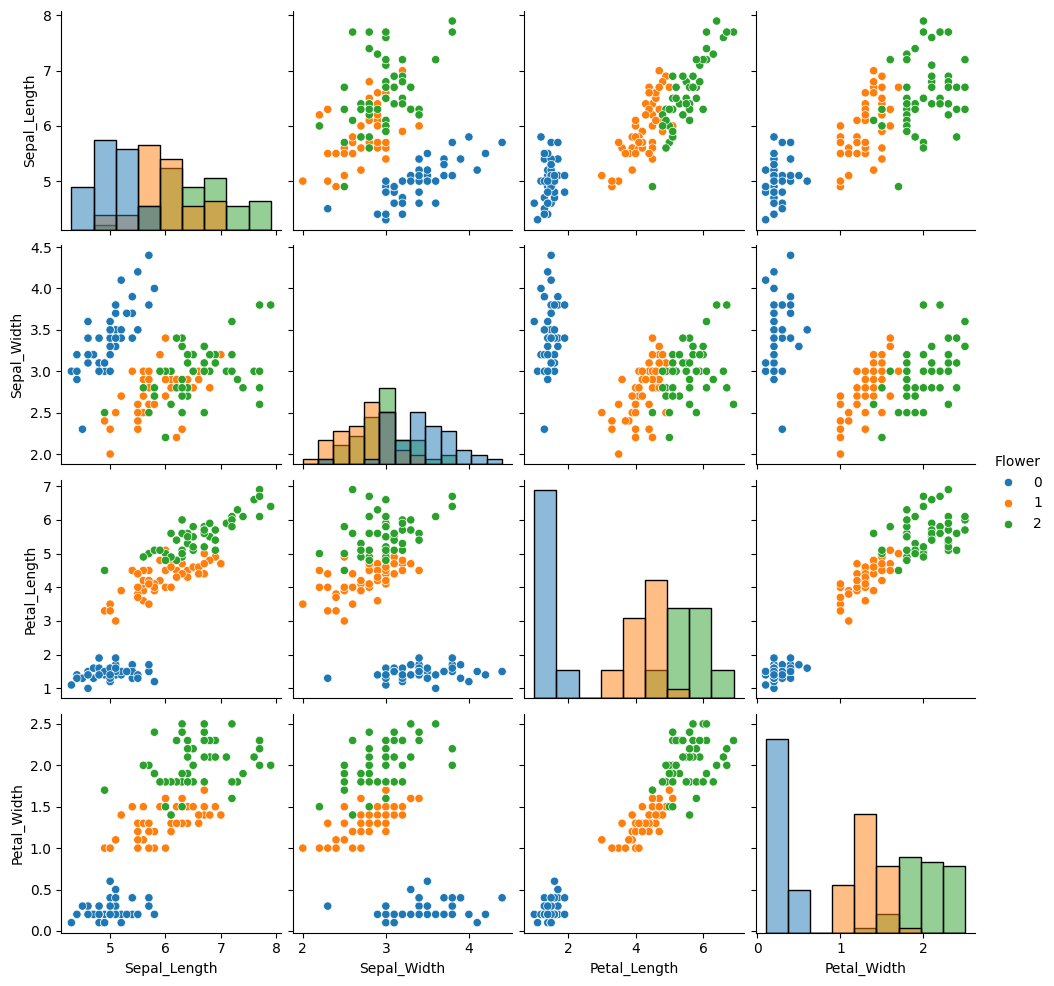

In [10]:
# Scatter plot of Petal_Length vs Petal_Width

# Convert 'Flower' column to categorical data type if it's not already
dataset['Flower'] = pd.Categorical(dataset['Flower'])

sns.pairplot(dataset, hue="Flower", diag_kind='hist')
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [11]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [12]:
# Understand the data X

print("X shape:", X.shape)

X shape: (150, 4)


In [13]:
# Understand the data y

print("Unique classes in y:", np.unique(y))

Unique classes in y: [0 1 2]


In [14]:
# Calculate the number of observations in the dataset

print("Total observations:", len(y))

Total observations: 150


In [15]:
# Calculate the number of observations for class 0

print("Observations per class:", dataset["Flower"].value_counts())

Observations per class: Flower
0    50
1    50
2    50
Name: count, dtype: int64


# Train a classifier

# Train the classification model

In [22]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split

# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Split the data here

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000, multi_class='auto')

# Fit the model to the training data
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

## Predict the class of a new observation

In [23]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [24]:
# Make the prediction using xnew
y_pred_xnew = classifier.predict(xnew)

# Get the predicted class
predicted_class = y_pred_xnew[0]

print("Predicted class:", predicted_class)

Predicted class: 0


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [25]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Number of observations in the train set
print(f"Número de observaciones en el conjunto de entrenamiento: {X_train.shape[0]}")


Número de observaciones en el conjunto de entrenamiento: 120


In [27]:
# Number of observations of each class in the train set
unique, counts = np.unique(y_train, return_counts=True)
print(f"Número de observaciones por clase en el conjunto de entrenamiento: {dict(zip(unique, counts))}")


Número de observaciones por clase en el conjunto de entrenamiento: {np.int64(0): np.int64(40), np.int64(1): np.int64(40), np.int64(2): np.int64(40)}


In [28]:
# Number of observations in the test set

print(f"Número de observaciones en el conjunto de prueba: {X_test.shape[0]}")

Número de observaciones en el conjunto de prueba: 30


In [29]:
# Number of observations of each class in the test set

unique, counts = np.unique(y_test, return_counts=True)
print(f"Número de observaciones por clase en el conjunto de prueba: {dict(zip(unique, counts))}")

Número de observaciones por clase en el conjunto de prueba: {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}


## Train the classification model

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
# Initialize the classifier
clf = SVC(kernel="linear", random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

## Test the classification model

In [32]:
# Make the predictions using the test set

y_pred = clf.predict(X_test)

In [33]:
# Explore real and predicted labels
print("Etiquetas reales:", y_test)
print("Etiquetas predichas:", y_pred)


Etiquetas reales: [0, 2, 1, 1, 0, ..., 1, 1, 0, 2, 0]
Length: 30
Categories (3, int64): [0, 1, 2]
Etiquetas predichas: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


## Compute the acurracy

In [34]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [35]:
# Calculate total accuracy

accuracy = compute_accuracy(y_test, y_pred)
print(f"Precisión total: {accuracy:.4f}")

Precisión total: 1.0000


In [36]:
# Calculate total accuracy using sklearn.metrics

accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"Precisión total (sklearn): {accuracy_sklearn:.4f}")

Precisión total (sklearn): 1.0000


In [37]:
# Compute accuracy for class 0
for class_label in np.unique(y_test):
    class_accuracy = compute_accuracy(y_test[y_test == class_label], y_pred[y_test == class_label])
    print(f"Precisión para la clase {class_label}: {class_accuracy:.4f}")


Precisión para la clase 0: 1.0000
Precisión para la clase 1: 1.0000
Precisión para la clase 2: 1.0000


## Confussion matrix

In [38]:
# Compute confussion matrix (normalized confusion matrix)

cm = confusion_matrix(y_test, y_pred, normalize="true")

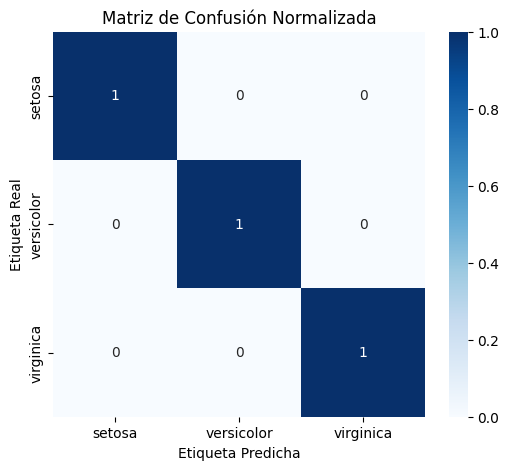

In [39]:
# Import sklearn datasets and load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Plot normalized confussion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión Normalizada")
plt.show()

In [40]:
print("Distribución de clases en y_train:", np.bincount(y_train))
print("Distribución de clases en y_test:", np.bincount(y_test))


Distribución de clases en y_train: [40 40 40]
Distribución de clases en y_test: [10 10 10]


In [41]:
cm_raw = confusion_matrix(y_test, y_pred)
print("Matriz de confusión sin normalizar:")
print(cm_raw)


Matriz de confusión sin normalizar:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# (a) Todas las variables
X_all = X  # Ya está definido
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)
clf_all = SVC(kernel="linear", random_state=42)
clf_all.fit(X_train_all, y_train)
y_pred_all = clf_all.predict(X_test_all)
acc_all = accuracy_score(y_test, y_pred_all)

# (b) Solo las variables de los pétalos
X_petal = X[:, 2:4]  # Asumiendo que las columnas 2 y 3 son petal length y petal width
X_train_petal, X_test_petal, _, _ = train_test_split(X_petal, y, test_size=0.2, random_state=42, stratify=y)
clf_petal = SVC(kernel="linear", random_state=42)
clf_petal.fit(X_train_petal, y_train)
y_pred_petal = clf_petal.predict(X_test_petal)
acc_petal = accuracy_score(y_test, y_pred_petal)

# (c) Solo las variables del sépalo
X_sepal = X[:, 0:2]  # Asumiendo que las columnas 0 y 1 son sepal length y sepal width
X_train_sepal, X_test_sepal, _, _ = train_test_split(X_sepal, y, test_size=0.2, random_state=42, stratify=y)
clf_sepal = SVC(kernel="linear", random_state=42)
clf_sepal.fit(X_train_sepal, y_train)
y_pred_sepal = clf_sepal.predict(X_test_sepal)
acc_sepal = accuracy_score(y_test, y_pred_sepal)

# Comparar los resultados
print(f"Precisión con todas las variables: {acc_all:.4f}")
print(f"Precisión con variables del pétalo: {acc_petal:.4f}")
print(f"Precisión con variables del sépalo: {acc_sepal:.4f}")


Precisión con todas las variables: 1.0000
Precisión con variables del pétalo: 0.9667
Precisión con variables del sépalo: 0.7333


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Clasificador SVM
clf_svm = SVC(kernel="linear", random_state=42)
clf_svm.fit(X_train_all, y_train)
y_pred_svm = clf_svm.predict(X_test_all)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Clasificador Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_all, y_train)
y_pred_rf = clf_rf.predict(X_test_all)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Comparar los resultados
print(f"Precisión SVM: {acc_svm:.4f}")
print(f"Precisión Random Forest: {acc_rf:.4f}")


Precisión SVM: 1.0000
Precisión Random Forest: 0.9000
